$$**Time - Series**$$

$Buisness - Objective$
#### We have build model to forecast furniture sales in future for a certain store . 
**Here we have any target variable with respect to time a specific time interval. So, we have to perform Time Series machine learning**

### Importing Libraries

In [1]:
#!pip install pmdarima

In [2]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.api import ExponentialSmoothing

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm


# libraries for evaluation
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

### uploading the data

In [5]:
# uploading the data
from google.colab import files
upload = files.upload()

Saving Proj4_TimeSeries_Sales_Data_Project.xls to Proj4_TimeSeries_Sales_Data_Project.xls


Read the data

In [6]:
import io
# raead the data
sales_df = pd.read_excel(io.BytesIO(upload['Proj4_TimeSeries_Sales_Data_Project.xls']),index_col="Order Date",parse_dates=True)

In [7]:
# first 2 rows
sales_df.head(2)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [8]:
# last 2 rows
sales_df.tail(2)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2017-02-26,9993,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.0,13.320
2017-05-04,9994,CA-2017-119914,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.948


In [9]:
# shape of the data
sales_df.shape

(9994, 20)

In [10]:
# information about the data

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2016-11-08 to 2017-05-04
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Pro

In [11]:
# column names
sales_df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [12]:
# describe the numerical columns
sales_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
# describe the non-numerical columns

sales_df.describe(include="object")

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [14]:
# describe the date columns

sales_df.describe(include="datetime64[ns]").T

,count,unique,top,freq,first,last
Ship Date,9994,1334,2015-12-16,35,2014-01-07,2018-01-05


In [15]:
# checking for missing values

sales_df.isnull().sum()

Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [16]:
# checking for duplicate rows 

sales_df.duplicated().sum() # no duplicate row are present in the data

0

In [17]:
# Removing unwanted columns
sales_df.drop(["Row ID",'Postal Code'],axis=1,inplace = True)

In [18]:
# Maximum and minimum sales

for i in ["City",'State','Product Name','Order ID', 'Ship Date','Customer ID','Product ID','Customer Name']:
  m = sales_df.groupby(by = i).count()
  j =m["Sales"]
  n =pd.DataFrame({i: j.index,"Sales": j.values})
  # highest sales 
  print(20*"*","highest sales",20*"*")
  print(n[n[["Sales"]].values==max(n[["Sales"]].values)])
  # lowest sales 
  print(20*"*","lowest sales",20*"*")
  print(n[n["Sales"].values==min(n["Sales"].values)])
  print(100*"*")

******************** highest sales ********************
              City  Sales
329  New York City    915
******************** lowest sales ********************
                  City  Sales
0             Aberdeen      1
1              Abilene      1
12             Antioch      1
17   Arlington Heights      1
22       Atlantic City      1
..                 ...    ...
496          Vacaville      1
507           Waterloo      1
509           Waukesha      1
519           Whittier      1
529            Yucaipa      1

[70 rows x 2 columns]
****************************************************************************************************
******************** highest sales ********************
        State  Sales
3  California   2001
******************** lowest sales ********************
      State  Sales
48  Wyoming      1
****************************************************************************************************
******************** highest sales ********************
     

* New york has highest sales and 70 cities has lowest sales .
* California has highest sales and Wyoming state has lowest sales .
* CA-2017-100111 Order ID  has highest sales and around 2538 order id has lowest sales.
* 2015-12-16 Ship Date  has highest sales and around 126 Ship Date has lowest sales.
*  WB-21850 Customer ID  has highest sales and around 5 Customer ID has lowest sales.
*  OFF-PA-10001970 Product ID  has highest sales and around 91 Product ID has lowest sales.
*  William Brown brought highest furnitures and around 4 customers bought lowest furnitures.

In [19]:
# Removing unwanted columns
sales_df.drop(['Order ID', 'Ship Date','Customer ID','Product ID','Customer Name','City'],axis=1,inplace = True)

### Data visualization (Uni_Variate)

In [20]:
# function to plot a boxplot and a histogram 

def histogram_boxplot(data, feature) :
  fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
  plt.suptitle(feature,size = 30,color="g")
  sns.boxplot(data[feature],ax=ax1)
  sns.histplot(data[feature],ax=ax2)

  plt.show()

Box-plot and histogrm for numerical columns

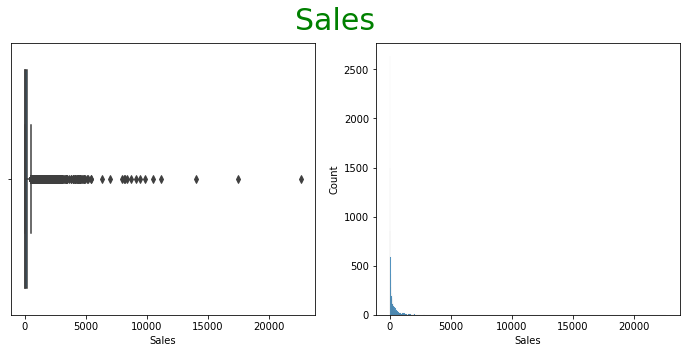

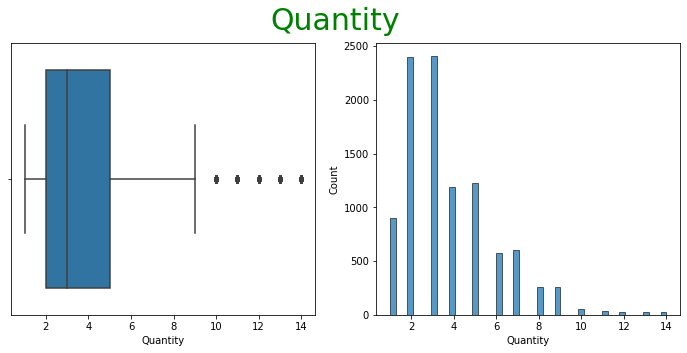

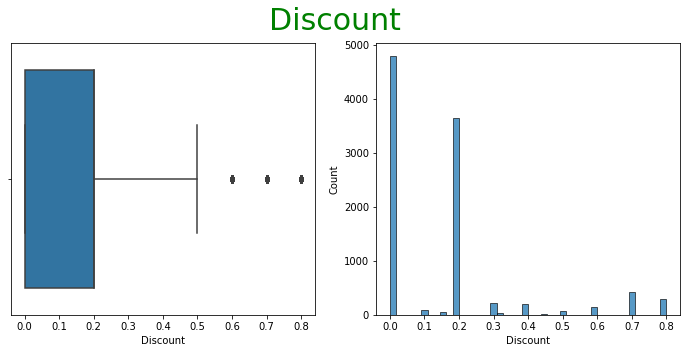

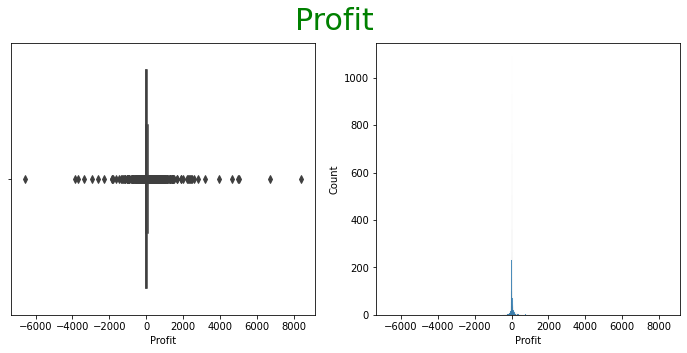

In [21]:
numeric_col= sales_df.select_dtypes("number").columns
for i in numeric_col:
  histogram_boxplot(sales_df,i)

There are outliers in the data ,So we have to perform outlier treatment .

In [22]:
# for loop for outlier treatment

for col in numeric_col:

    quartile_3 = sales_df[col].quantile(.75) 
    quartile_1 = sales_df[col].quantile(.25)

    IQR = quartile_3 - quartile_1 # inter quartine range

    upper_f = quartile_3 + 1.5 * IQR

    lower_f = quartile_1 - 1.5 * IQR

    index1 = sales_df[sales_df [col]>upper_f]. index

    index2 = sales_df[sales_df [col]<lower_f].index
    
    sales_df.loc[index1, col] = sales_df[col].median()

    sales_df.loc[index2, col] = sales_df[col].median()

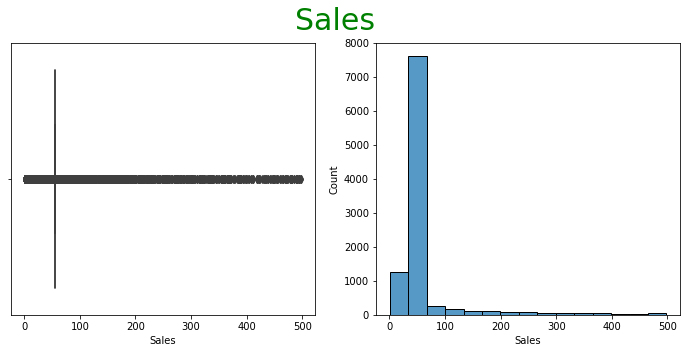

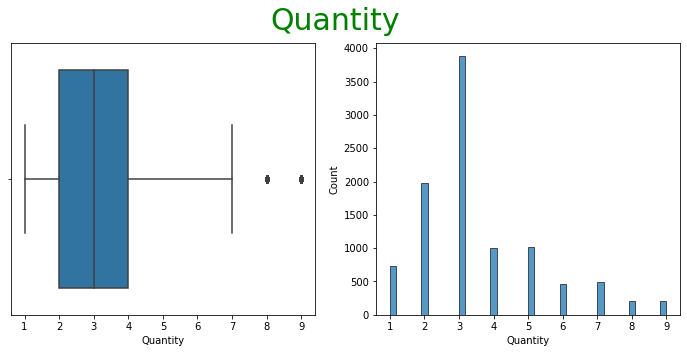

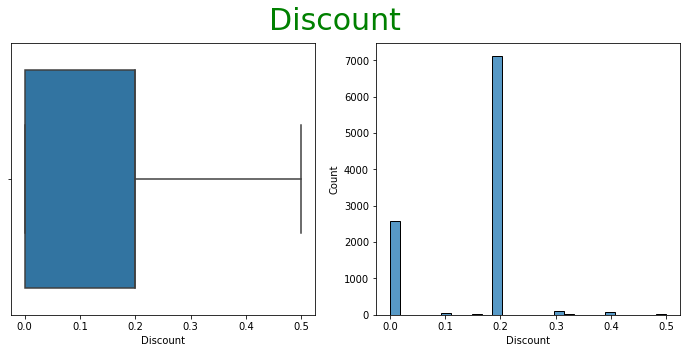

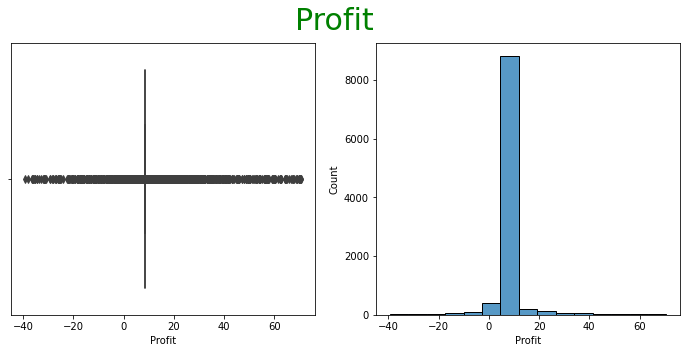

In [23]:
 # Creating box plot and histogram for age column blue line represents  mean and redline repredents the median (after outlier treatment)
numeric_col= sales_df.select_dtypes("number").columns
for i in numeric_col:
  histogram_boxplot(sales_df,i)





##### After outlier treatment there are no outlier in the data

Barplots for object columns

In [24]:
# function for bar plots for object columns
cat_col= sales_df.select_dtypes("object").columns
def bar(df,i):
  plt.suptitle(i,size = 20)
  g = df[i].value_counts()
  h=pd.DataFrame({"ind":g.index,"value":g.values})
  plt.barh(h["ind"].values,h["value"].values,color ="c",edgecolor='black')
  plt.show()

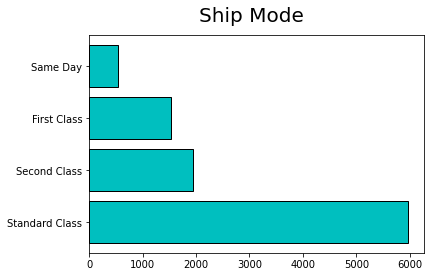

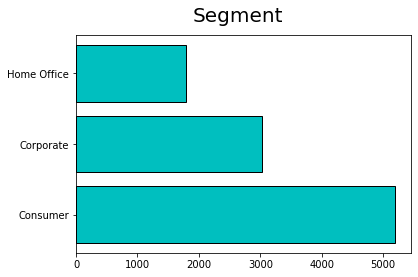

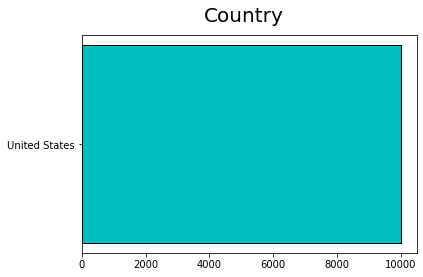

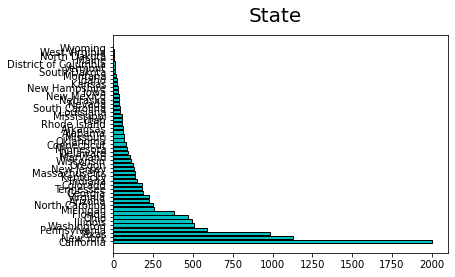

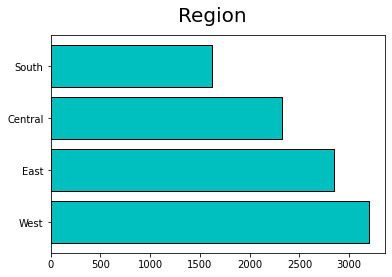

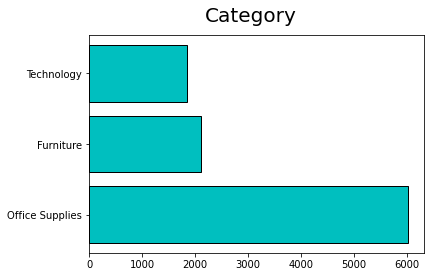

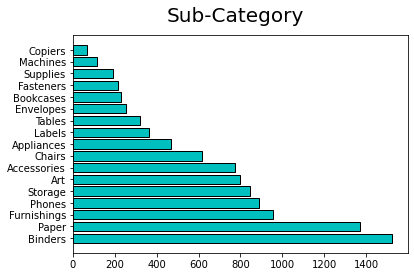

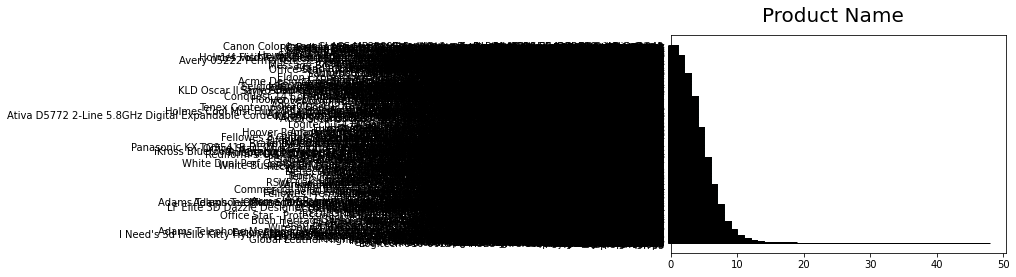

In [25]:
# barplots for all object columns

for i in cat_col:
  bar(sales_df,i)

##### Maximum number of ship mode is Standerd class and minimum is Same day .
##### All this data is for United States so we that does not have any impact on the data so we can remove that columns.
##### Maximum number of orders comes from west region and minimum from south .
##### Maximum number of order's category is Office supplies and minimum for Technology .
##### Maximum number of order's Sub_category is Binders and minimum for copies .

In [26]:
# corelaation
corr=sales_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.064987,-0.010525,0.191507
Quantity,0.064987,1.000000,0.004378,0.067431
Discount,-0.010525,0.004378,1.000000,-0.123703
Profit,0.191507,0.067431,-0.123703,1.000000


Sales has weak positive corelation win Profit , Quantity and Discount has weak neg corelation .

In [27]:
# Removing unwanted columns
sales_df.drop(['Ship Mode', 'Segment', 'Country', 'State', 'Region', 'Category',
       'Sub-Category', 'Product Name'] ,axis=1,inplace = True)

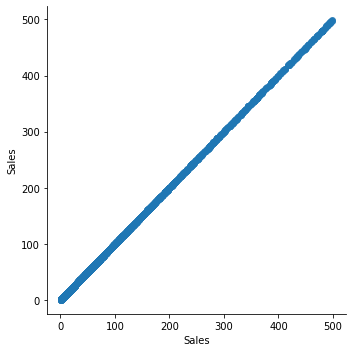

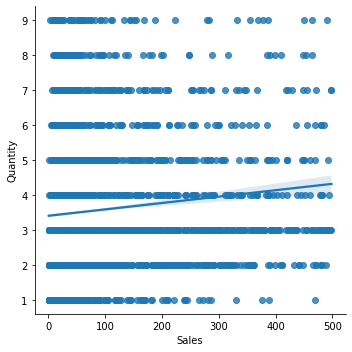

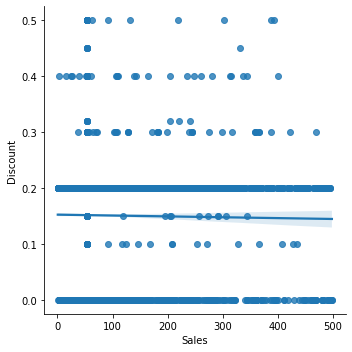

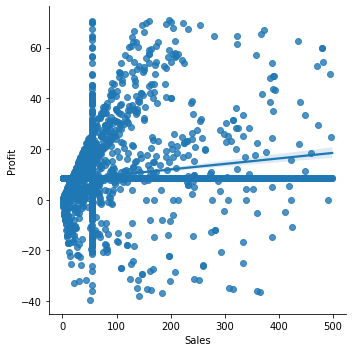

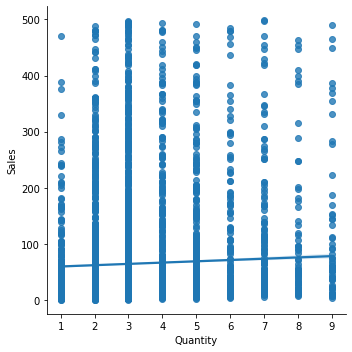

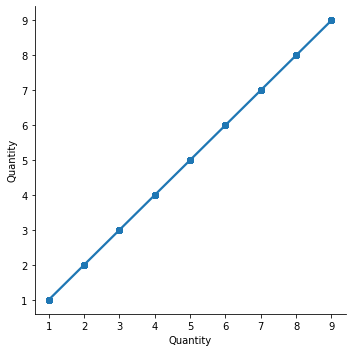

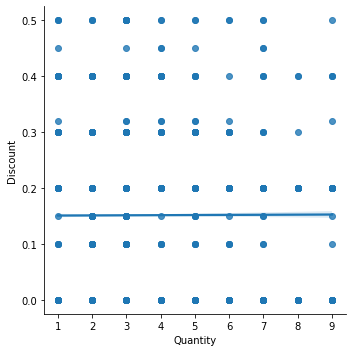

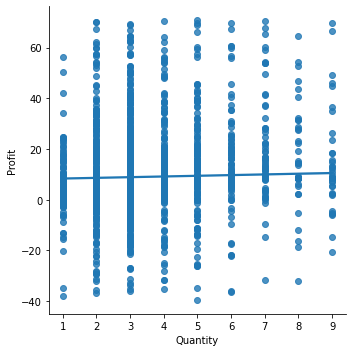

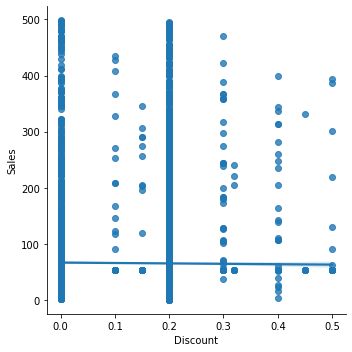

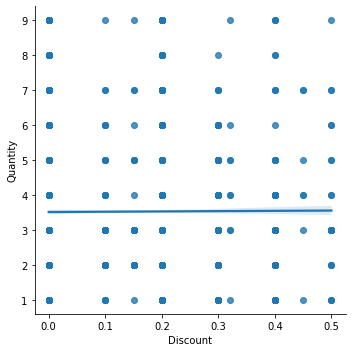

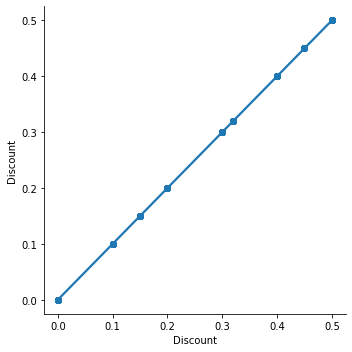

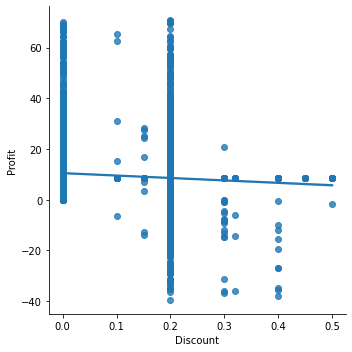

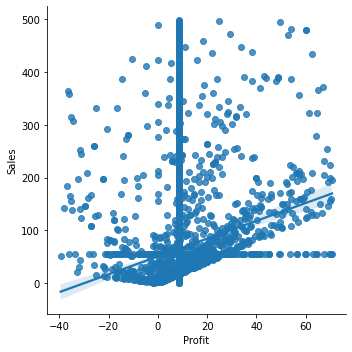

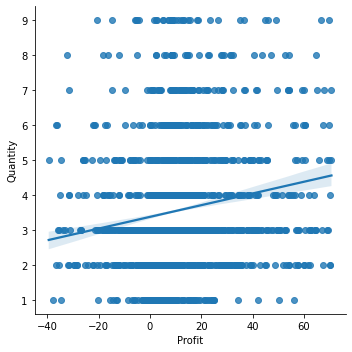

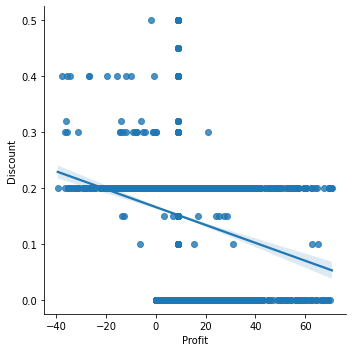

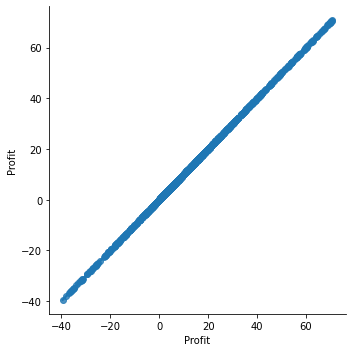

In [28]:
# scatter plot for all numerical columns

for i in sales_df.columns:
  for j in sales_df.columns:
    sns.lmplot(data = sales_df, x=i, y=j,palette="Dark2")

### ----------------------------------------------------------------------------------------------------------------------------------------

In [78]:
 # make the data month wise
 new_sales_df = sales_df.resample('M').mean()

In [79]:
# first 5 rows
new_sales_df.head()

,Sales,Quantity,Discount,Profit
Order Date,,,,
2014-01-31,71.117215,3.303797,0.132278,9.122672
2014-02-28,64.497870,3.217391,0.108696,7.904750
2014-03-31,76.251624,3.343949,0.133121,8.931531
2014-04-30,64.409896,3.585185,0.105556,9.714771
2014-05-31,72.128828,3.672131,0.145492,11.376671


In [80]:
# selecting only sales column
new_main_df = new_sales_df.loc[:,["Sales"]]

In [81]:
# first five rows
new_main_df.head()

,Sales
Order Date,
2014-01-31,71.117215
2014-02-28,64.497870
2014-03-31,76.251624
2014-04-30,64.409896
2014-05-31,72.128828


In [82]:
print("Shape of the data = ",new_main_df.shape)

Shape of the data =  (48, 1)


In [83]:
new_main_df.head(2)

,Sales
Order Date,
2014-01-31,71.117215
2014-02-28,64.497870


### Split the data

In [84]:
# split the data into train and test 

index = int(len(new_main_df)*.7) # 70 - 30 split

train_df = new_main_df.iloc[:index] 

test_df = new_main_df.iloc[index:] 

train1 = train_df[["Sales"]]
test1 = test_df[["Sales"]] 
print("train= {}, test = {}".format(len(train1), len(test1)))

train= 33, test = 15


 Checkinhg for various components of the Time series data

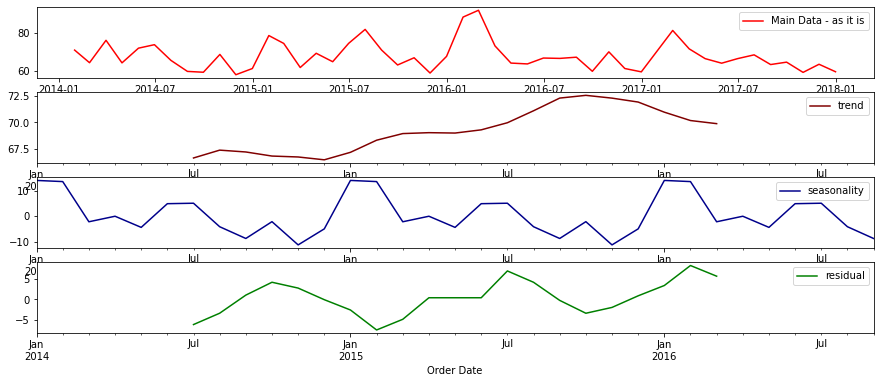

In [85]:
plt.subplots(4,1,figsize=(15,6))
decomposition = sm.tsa.seasonal_decompose(train1, model='additive')
plt.subplot(411)
plt.plot(new_main_df,label='Main Data - as it is',color="r")
plt.legend(loc='best')

plt.subplot(412)
decomposition.trend.plot(label='trend',color="maroon")
plt.legend(loc='best')

plt.subplot(413)
decomposition.seasonal.plot(label='seasonality',color="darkblue")
plt.legend(loc='best')

plt.subplot(414)
decomposition.resid.plot(label='residual',color="g")
plt.legend(loc='best')
plt.show()

Data is smooth - the signals are clear

### Check if the time series is stationary and use the Augmented Dickey-Fuller test for stationarity testing.

In [86]:
# dickey-fuller test for stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1] # To get Pvalue it is in 1st index at output
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [87]:
# check the data for stationarity(main data)

print(checkStationarity(new_main_df))

p-value=4.004002524820231e-05. Data is stationary


Data is stationary - Mean and variance are constant over the time period .

AutoCorrelation and Partial AutoCorrelation plot

In [88]:
# function for AutoCorrelation and partial AutoCorrelation plot

def acf_pacf(data,lag):
    # p -> ACF (auto correlation graph)
    # q -> PACF (partial autocorrelation graph)
    # d -> differential level (from top)

    # since, lags cannot be determined at the beginning, set a random number initially
    lag_acf = acf(data, nlags=lag)
    lag_pacf = pacf(data, nlags=lag, method='ols')

    plt.figure(figsize=(15,5))
      # plot PACF (p)
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color="gray")
    plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color="gray")
    plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color="gray")
    plt.title("Partial AutoCorrelation")

    # plot ACF (q)
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color="gray")
    plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color="gray")
    plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color="gray")
    plt.title("AutoCorrelation")

    plt.tight_layout()
    plt.show()

In [89]:
# function for AutoCorrelation and Partial AutoCorrelation plot
    # p -> ACF (auto correlation graph)
    # q -> PACF (partial autocorrelation graph)
    # d -> differential level (from top)

def acf_pacf1(data,l):

    fig = plt.figure(figsize= (8, 6) )

    #Show ACF

    ax1=fig.add_subplot(211)

    sm.graphics.tsa.plot_acf(data, lags = l, ax = ax1 )

    # Show PACF

    ax2=fig.add_subplot(212)

    sm.graphics.tsa.plot_pacf(data, lags = l, ax = ax2 )

    plt.tight_layout()

In [90]:
# LJung-Box test (model testeing)
def test(model):
    pvalue = sm.stats.acorr_ljungbox(model.resid,lags=[1],return_df=True)['lb_pvalue'].values
    if pvalue < 0.05:
        print("Reject H0. Bad model")
    else:
        print("Fail-to-Reject H0. Good model")

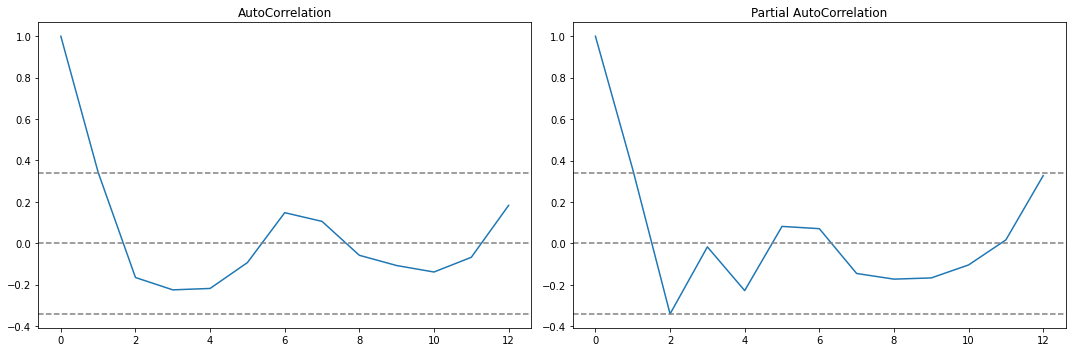

In [91]:
# AutoCorrelation and partial AutoCorrelation plot
acf_pacf(train1,12)

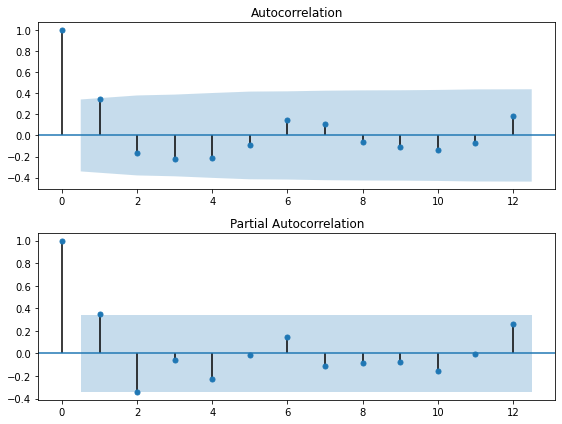

In [93]:
# AutoCorrelation and partial AutoCorrelation plot
acf_pacf1(train1,12)

We can see that in the acf and pacf graph there is only one point that is outside of the Shaded area. so, ACF and  PACF value will be 1.

Finding best values for p and q for the ARMA MODEL

In [94]:
## making dataframe for best p and q values by using AIC values 
import warnings
warnings.filterwarnings("ignore")

k = [];l = [];m = [];n = [];o =[]
for p in range(1,2):
    for q in range(1,2):
        m1 = ARIMA(train1["Sales"],order=(p,0,q)).fit()
        k.append (p)
        l.append (q)
        m.append (m1.aic)
        n.append (m1.bic)
        o.append (m1.hqic)

ii_df1 = pd.DataFrame({"p value":k,"q value":l,"AIC values":m,"BIC values":n,"HQIC values":o})

In [95]:
# printing different p,q,AIC,BIC and HQIC VALUES FOR THE MODEL
print(ii_df1)

   p value  q value  AIC values  BIC values  HQIC values
0        1        1   231.09682   237.08285   233.110937


In [96]:
 # finding lowest values of AIC and show that row

ii_df1[ii_df1["AIC values"]==np.min(ii_df1["AIC values"])]

,p value,q value,AIC values,BIC values,HQIC values
0,1,1,231.09682,237.08285,233.110937


In [97]:
# Arma Model where p = 1,q =1 and d=0
arma_model = ARIMA(train1["Sales"],order=(1,0,1)).fit()
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -111.548
Date:                Tue, 29 Nov 2022   AIC                            231.097
Time:                        02:00:04   BIC                            237.083
Sample:                    01-31-2014   HQIC                           233.111
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.9020      2.046     33.677      0.000      64.892      72.912
ar.L1         -0.1104      0.283     -0.390      0.697      -0.666       0.445
ma.L1          0.6356      0.250      2.548      0.0

Forecasting the values in arma model

In [98]:
# forecasts sales by using the Model

forecasts1 = arma_model.forecast(len(test1))
print(forecasts1)

2016-10-31    64.218761
2016-11-30    69.419050
2016-12-31    68.844858
2017-01-31    68.908258
2017-02-28    68.901258
2017-03-31    68.902031
2017-04-30    68.901945
2017-05-31    68.901955
2017-06-30    68.901954
2017-07-31    68.901954
2017-08-31    68.901954
2017-09-30    68.901954
2017-10-31    68.901954
2017-11-30    68.901954
2017-12-31    68.901954
Freq: M, Name: predicted_mean, dtype: float64


In [99]:
 # actual vs predicted values(test)
actual = []; forcast = []

for i in range(len(forecasts1)):
    actual.append(test1["Sales"][i])
    forcast.append(forecasts1[i])

df_res1 = pd.DataFrame({'actual':actual, 'forcasted':forcast},index =test1.index)
df_res1['err'] = df_res1.actual - df_res1.forcasted
print(df_res1)

               actual  forcasted        err
Order Date                                 
2016-10-31  70.193107  64.218761   5.974346
2016-11-30  61.443541  69.419050  -7.975509
2016-12-31  59.690494  68.844858  -9.154364
2017-01-31  71.105232  68.908258   2.196974
2017-02-28  81.429664  68.901258  12.528406
2017-03-31  71.759761  68.902031   2.857730
2017-04-30  66.630387  68.901945  -2.271558
2017-05-31  64.237419  68.901955  -4.664536
2017-06-30  66.638420  68.901954  -2.263533
2017-07-31  68.614611  68.901954  -0.287343
2017-08-31  63.525284  68.901954  -5.376669
2017-09-30  64.787510  68.901954  -4.114444
2017-10-31  59.416389  68.901954  -9.485564
2017-11-30  63.674316  68.901954  -5.227638
2017-12-31  59.746515  68.901954  -9.155439


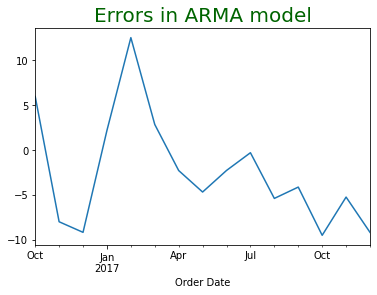

In [100]:
# errors for ARMA model(test)
plt.title("Errors in ARMA model",size = 20,color="darkgreen")
df_res1.err.plot()
plt.show()

LJung-Box test (model testeing)

In [101]:
# checking the model is good or bad 
test(arma_model)

Fail-to-Reject H0. Good model


In [102]:
# calculating the errors(ARMA) 
# low mse and rmse is good for the model
p=1;q=1;d=0
msg1 = 'ARMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res1.actual, df_res1.forcasted)
print(msg1 + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(1,0,1)
	MSE = 42.143043105390554
	RMSE = 6.491767332968007


Plotting the actual - forecasted for ARMA

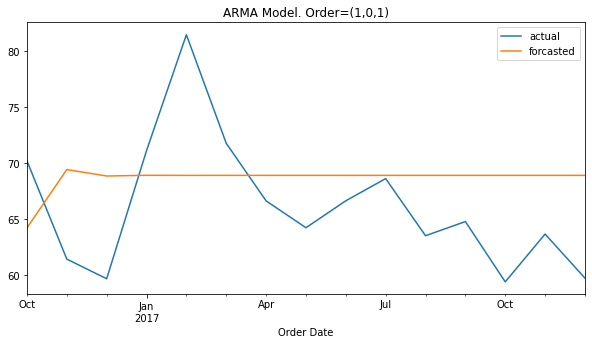

In [103]:
# Plot actual vs. predicted values(test)

df_res1.actual.plot(figsize=(10,5),legend=True)
df_res1.forcasted.plot(legend=True)
plt.title(msg1)
plt.show()

In [108]:
# exogenious factor
stop= len(new_sales_df)
forecasted_values1 = arma_model.forecast(stop)

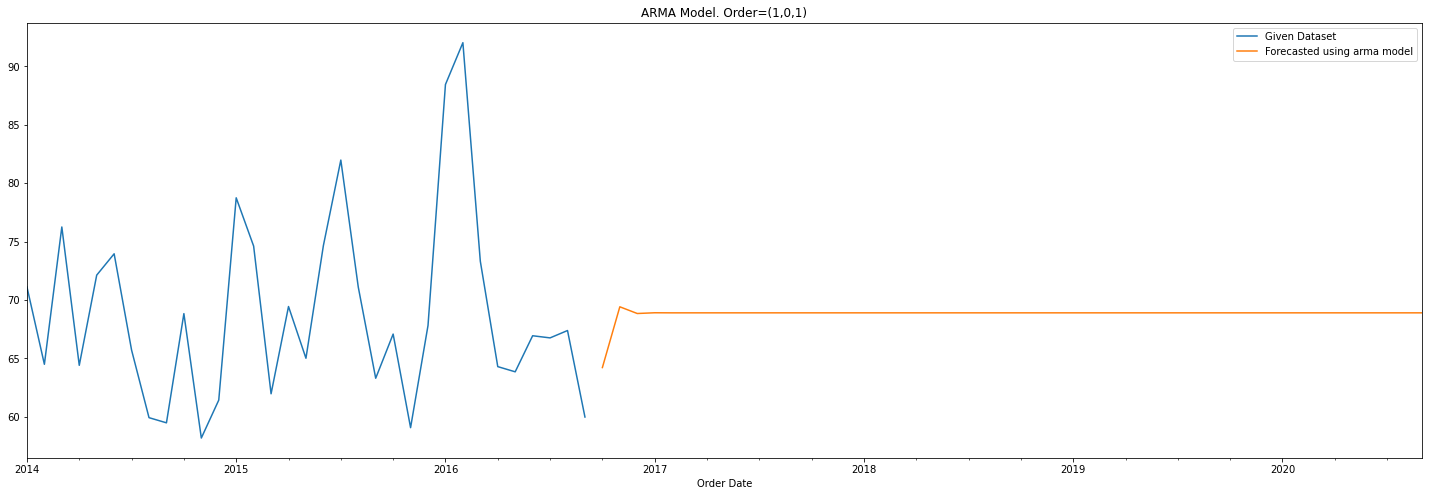

In [109]:
# plotting given data and forecasted values
train1.Sales.plot(figsize=(25,8),label="Given Dataset")
forecasted_values1.plot(label="Forecasted using arma model")
plt.legend()
plt.title(msg1)
plt.show()

### ARIMA model

In [110]:
## making dataframe for best p and q values by using AIC values 
import warnings
warnings.filterwarnings("ignore")

k = [];l = [];m = [];n = [];o =[];h=[]
for p in range(1,2):
    for q in range(1,2):
      for d in range(1,2) :
          m1 = ARIMA(train1["Sales"],order=(p,d,q)).fit()
          k.append (p)
          l.append (q)
          h.append (d)
          m.append (m1.aic)
          n.append (m1.bic)
          o.append (m1.hqic)

ii_df2 = pd.DataFrame({"p value":k,"d value":h,"q value":l,"AIC values":m,"BIC values":n,"HQIC values":o})

In [111]:
# printing different p,d,q,AIC,BIC and HQIC VALUES FOR THE MODEL
print(ii_df2)

   p value  d value  q value  AIC values  BIC values  HQIC values
0        1        1        1  229.142701  233.539909   230.600251


In [112]:
# finding lowest values of AIC and show that row

ii_df2[ii_df2["AIC values"]==np.min(ii_df2["AIC values"])]

,p value,d value,q value,AIC values,BIC values,HQIC values
0,1,1,1,229.142701,233.539909,230.600251


In [113]:
# Arma Model where p = 1,q =1 and d=1
arima_model = ARIMA(train1["Sales"],order=(1,1,1)).fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -111.571
Date:                Tue, 29 Nov 2022   AIC                            229.143
Time:                        02:02:01   BIC                            233.540
Sample:                    01-31-2014   HQIC                           230.600
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3889      0.277      1.405      0.160      -0.154       0.931
ma.L1         -0.9988     11.231     -0.089      0.929     -23.010      21.013
sigma2        57.4892    634.826      0.091      0.9

In [114]:
# forecasts sales by using the Model

forecasts2 = arima_model.forecast(len(test1))
print(forecasts2)

2016-10-31    65.358121
2016-11-30    67.448009
2016-12-31    68.260663
2017-01-31    68.576664
2017-02-28    68.699541
2017-03-31    68.747322
2017-04-30    68.765901
2017-05-31    68.773126
2017-06-30    68.775936
2017-07-31    68.777028
2017-08-31    68.777453
2017-09-30    68.777618
2017-10-31    68.777682
2017-11-30    68.777707
2017-12-31    68.777717
Freq: M, Name: predicted_mean, dtype: float64


In [115]:
 # actual vs predicted values(test)
actual = []; forcast = []

for i in range(len(forecasts2)):
    actual.append(test1["Sales"][i])
    forcast.append(forecasts2[i])

df_res2 = pd.DataFrame({'actual':actual, 'forecasted':forcast},index =test1.index)
df_res2['err'] = df_res2.actual - df_res2.forecasted
print(df_res2)

               actual  forecasted        err
Order Date                                  
2016-10-31  70.193107   65.358121   4.834986
2016-11-30  61.443541   67.448009  -6.004468
2016-12-31  59.690494   68.260663  -8.570169
2017-01-31  71.105232   68.576664   2.528568
2017-02-28  81.429664   68.699541  12.730122
2017-03-31  71.759761   68.747322   3.012439
2017-04-30  66.630387   68.765901  -2.135514
2017-05-31  64.237419   68.773126  -4.535707
2017-06-30  66.638420   68.775936  -2.137515
2017-07-31  68.614611   68.777028  -0.162417
2017-08-31  63.525284   68.777453  -5.252168
2017-09-30  64.787510   68.777618  -3.990108
2017-10-31  59.416389   68.777682  -9.361293
2017-11-30  63.674316   68.777707  -5.103391
2017-12-31  59.746515   68.777717  -9.031202


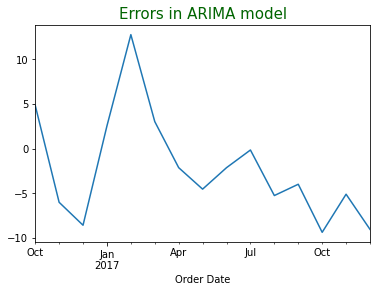

In [116]:
# errors for ARIMA model(test)
plt.title("Errors in ARIMA model",size = 15,color="darkgreen")
df_res2.err.plot()
plt.show()

LJung-Box test (model testeing)

In [117]:
# checking the model is good or bad 
test(arima_model)

Fail-to-Reject H0. Good model


In [118]:
# calculating the errors(ARIMA) 
# low mse and rmse is good for the model
p=1;q=1;d=1
msg2 = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse2 = mean_squared_error(df_res2.actual, df_res2.forecasted)
print(msg2 + "\n\tMSE = {}\n\tRMSE = {}".format(mse2,np.sqrt(mse2)))

ARIMA Model. Order=(1,1,1)
	MSE = 38.59190937409195
	RMSE = 6.212238676523299


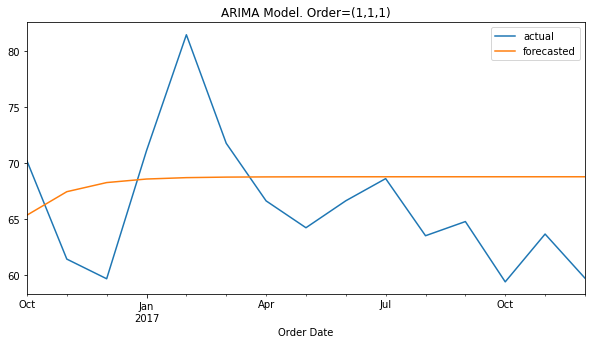

In [119]:
# Plot actual vs. predicted values

df_res2.actual.plot(figsize=(10,5),legend=True)
df_res2.forecasted.plot(legend=True)
plt.title(msg2)
plt.show()

In [120]:
# exogenious factor
stop= len(new_sales_df)
forecasted_values2 = arima_model.forecast(stop)

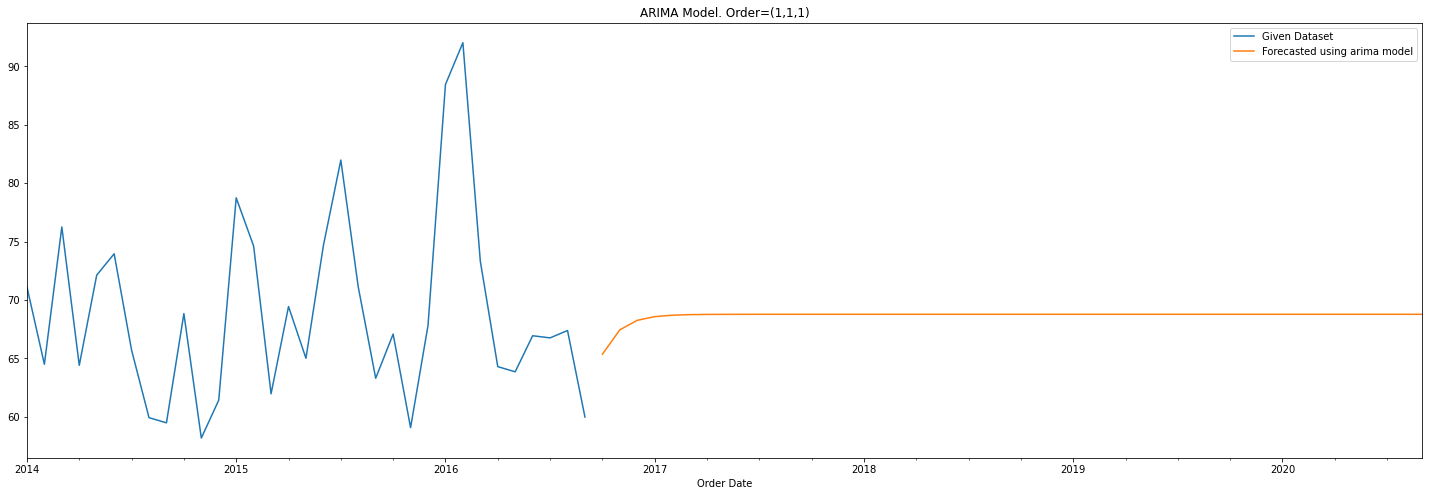

In [121]:
# plotting given data and forecasted values
train1.Sales.plot(figsize=(25,8),label="Given Dataset")
forecasted_values2.plot(label="Forecasted using arima model")
plt.legend()
plt.title(msg2)
plt.show()

### SARIMA MODEL

In [131]:
## making dataframe for best p ,d and q values by using AIC values 
k = [];l = [];m = [];n = [];o =[];y=[]
for p in range(1,2):
    for q in range(1,2):
        for d in range(1,2):
            m2 = SARIMAX(train1["Sales"],order=(p,d,q),seasonal_order=(p,d,q,7)).fit()
            k.append (p)
            l.append (q)
            m.append (m2.aic)
            n.append (m2.bic)
            o.append (m2.hqic)
            y.append (d)
            
all_df2 = pd.DataFrame({"p value":k,"d value":y,"q value":l,"AIC values":m,"BIC values":n,"HQIC values":o})

In [132]:
# printing different p,d,q,AIC,BIC and HQIC VALUES FOR THE MODEL
print(all_df2)

   p value  d value  q value  AIC values  BIC values  HQIC values
0        1        1        1  196.948582  203.042962   198.638904


In [133]:
 # finding lowest values of AIC and show that row

all_df2[all_df2["AIC values"]==np.min(all_df2["AIC values"])]

,p value,d value,q value,AIC values,BIC values,HQIC values
0,1,1,1,196.948582,203.042962,198.638904


In [135]:
# build model

sarima_model = SARIMAX(train1["Sales"], order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

In [136]:
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   33
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -72.233
Date:                            Tue, 29 Nov 2022   AIC                            154.465
Time:                                    02:04:37   BIC                            159.444
Sample:                                01-31-2014   HQIC                           155.437
                                     - 09-30-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4002      0.450      0.890      0.374      -0.482       1.282
ma.L1         -0.9995    124.329   

Forecasting the values in sarima model

In [137]:
# forecasting SARIMA model
forecast3 = sarima_model.forecast(len(test1)) 
forecast3

2016-10-31    68.163328
2016-11-30    60.417844
2016-12-31    67.694707
2017-01-31    86.597020
2017-02-28    87.097577
2017-03-31    75.673098
2017-04-30    68.158513
2017-05-31    68.950734
2017-06-30    72.602073
2017-07-31    71.653116
2017-08-31    69.449966
2017-09-30    63.458389
2017-10-31    71.280440
2017-11-30    62.763411
2017-12-31    69.069407
Freq: M, Name: predicted_mean, dtype: float64

 Prediction on actual data (SARIMA)

In [138]:
# actual vs predicted values
actual = []; forcast = []

for i in range(len(forecast3)):
    actual.append(test1["Sales"][i])
    forcast.append(forecast3[i])

df_res3 = pd.DataFrame({'actual':actual, 'forcasted':forcast},index =test1.index)
df_res3['err'] = df_res3.actual - df_res3.forcasted
print(df_res3)

               actual  forcasted        err
Order Date                                 
2016-10-31  70.193107  68.163328   2.029779
2016-11-30  61.443541  60.417844   1.025696
2016-12-31  59.690494  67.694707  -8.004213
2017-01-31  71.105232  86.597020 -15.491787
2017-02-28  81.429664  87.097577  -5.667913
2017-03-31  71.759761  75.673098  -3.913338
2017-04-30  66.630387  68.158513  -1.528126
2017-05-31  64.237419  68.950734  -4.713315
2017-06-30  66.638420  72.602073  -5.963653
2017-07-31  68.614611  71.653116  -3.038506
2017-08-31  63.525284  69.449966  -5.924681
2017-09-30  64.787510  63.458389   1.329121
2017-10-31  59.416389  71.280440 -11.864051
2017-11-30  63.674316  62.763411   0.910905
2017-12-31  59.746515  69.069407  -9.322891


 Plotting the Errors for SARIMA model

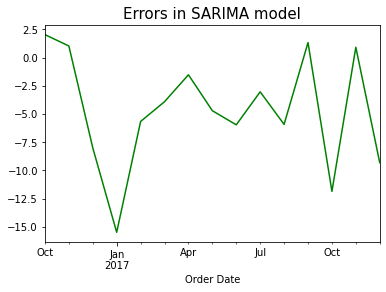

In [139]:
# errors for SARIMA model
plt.title("Errors in SARIMA model",size = 15)
df_res3.err.plot(color= "g")
plt.show()

LJung-Box test (model testeing)

In [140]:
# checking the model is good or bad 
test(sarima_model)

Fail-to-Reject H0. Good model


In [141]:
 # calculating the errors (SARIMA) 
# low mse and rmse is good for the model
p=1;q=1;d=1
msg3 = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse3 = mean_squared_error(df_res3.actual, df_res3.forcasted)
print(msg3 + "\n\tMSE = {}\n\tRMSE = {}".format(mse3,np.sqrt(mse3)))

SARIMA Model. Order=(1,1,1)
	MSE = 46.09285017828653
	RMSE = 6.789171538434313


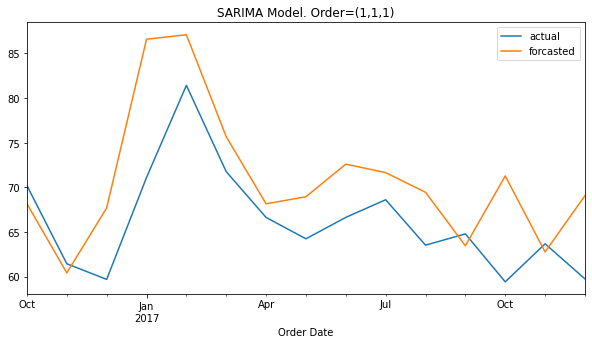

In [142]:
# Plot actual vs. predicted values

df_res3.actual.plot(figsize=(10,5),legend=True)
df_res3.forcasted.plot(legend=True)
plt.title(msg3)
plt.show()

In [143]:
stop= len(new_sales_df)
forecasted_values3 = sarima_model.forecast(stop)
print(forecasted_values3)

2016-10-31    68.163328
2016-11-30    60.417844
2016-12-31    67.694707
2017-01-31    86.597020
2017-02-28    87.097577
2017-03-31    75.673098
2017-04-30    68.158513
2017-05-31    68.950734
2017-06-30    72.602073
2017-07-31    71.653116
2017-08-31    69.449966
2017-09-30    63.458389
2017-10-31    71.280440
2017-11-30    62.763411
2017-12-31    69.069407
2018-01-31    87.105970
2018-02-28    86.255604
2018-03-31    77.870515
2018-04-30    70.977939
2018-05-31    72.286415
2018-06-30    76.173420
2018-07-31    74.901916
2018-08-31    71.508136
2018-09-30    66.110039
2018-10-31    73.781759
2018-11-30    64.940521
2018-12-31    70.838564
2019-01-31    88.511347
2019-02-28    87.093340
2019-03-31    79.985364
2019-04-30    73.354149
2019-05-31    74.879548
2019-06-30    78.865578
2019-07-31    77.458543
2019-08-31    73.564476
2019-09-30    68.415752
2019-10-31    76.024303
2019-11-30    67.046837
2019-12-31    72.773463
2020-01-31    90.293391
2020-02-29    88.636868
2020-03-31    82

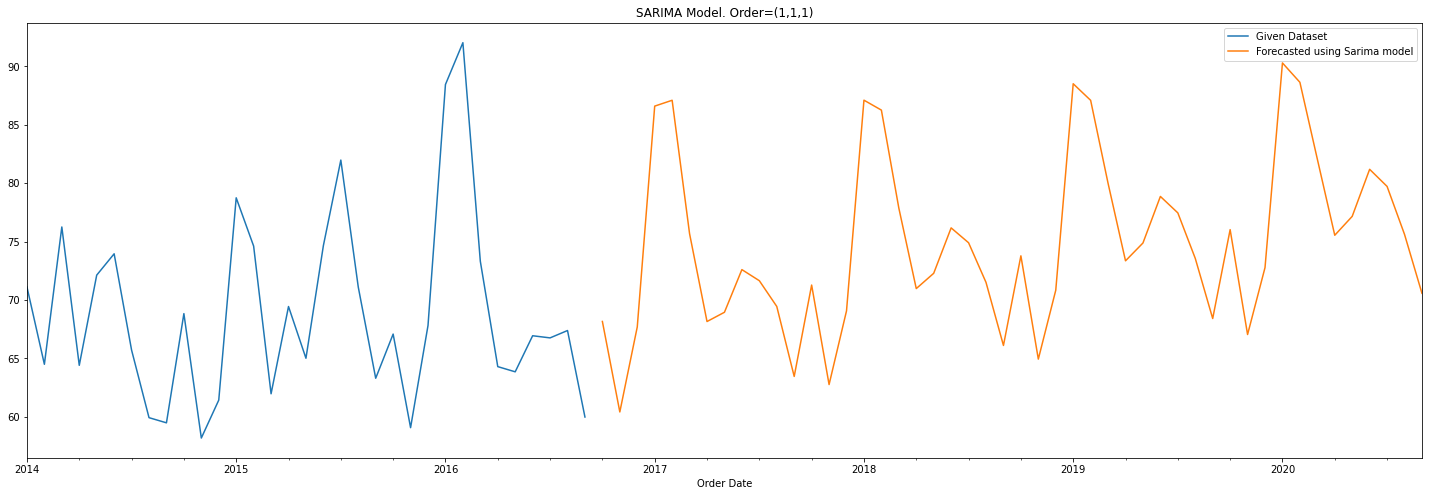

In [144]:
# plotting given data and forecasted values
train1.Sales.plot(figsize=(25,8),label="Given Dataset")
forecasted_values3.plot(label="Forecasted using Sarima model")
plt.legend()
plt.title(msg3)
plt.show()

### SARIMAX model

In [147]:
# make the data month wise (for SARIMAX)
df2 = sales_df.resample("M").mean()

In [148]:
# split the data into train and test (for SARIMAX)

index = int(len(df2)*.7) # 70 - 30 split

train_df2 = df2.iloc[:index] 

test_df2 = df2.iloc[index:] 

print("train= {}, test = {}".format(train_df2.shape, test_df2.shape))

train= (33, 4), test = (15, 4)


In [149]:
def check(new_main_df):
  plt.subplots(4,1,figsize=(15,6))
  decomposition = sm.tsa.seasonal_decompose(new_main_df, model='additive')
  plt.subplot(411)
  plt.plot(new_main_df,label='Main Data - as it is',color="r")
  plt.legend(loc='best')

  plt.subplot(412)
  decomposition.trend.plot(label='trend',color="maroon")
  plt.legend(loc='best')

  plt.subplot(413)
  decomposition.seasonal.plot(label='seasonality',color="darkblue")
  plt.legend(loc='best')

  plt.subplot(414)
  decomposition.resid.plot(label='residual',color="g")
  plt.legend(loc='best')
  plt.show()

**************************************************Sales**************************************************


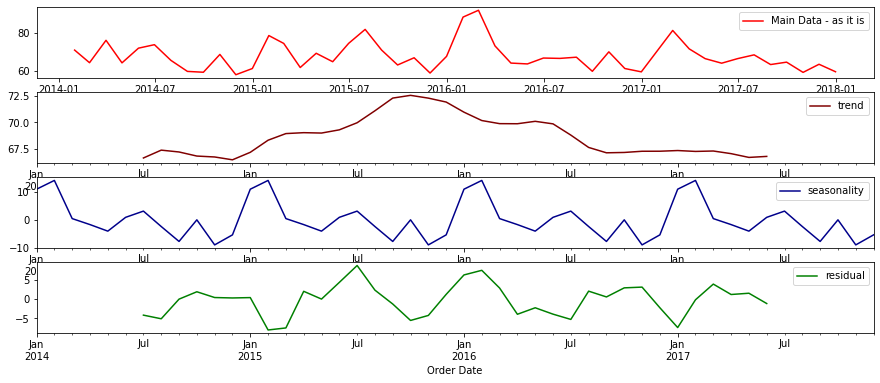

**************************************************Quantity**************************************************


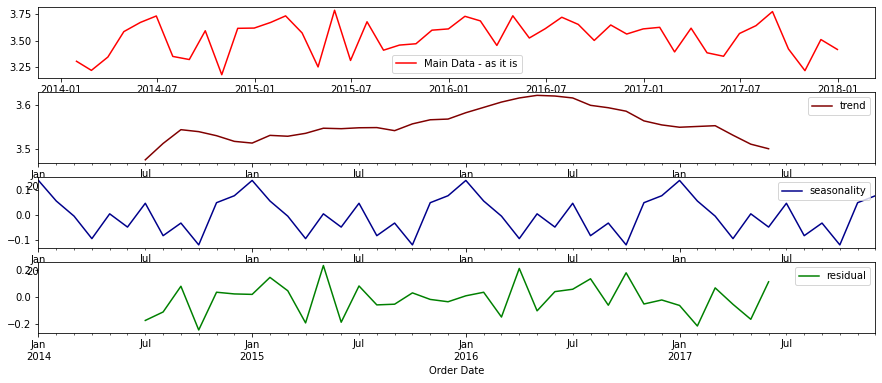

**************************************************Discount**************************************************


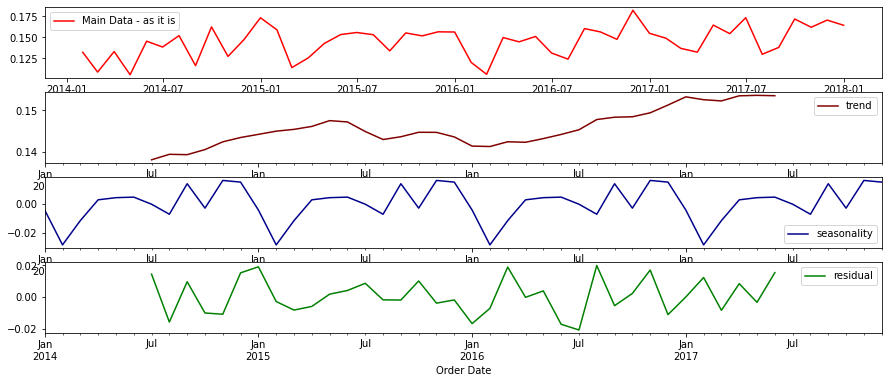

**************************************************Profit**************************************************


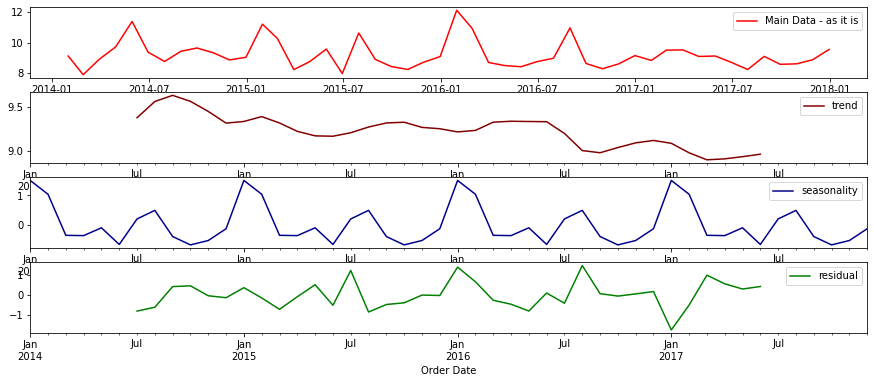

In [150]:
for i in df2.columns:
 # checking for the components
  print(50*"*"+str(i)+50*"*")
  check(df2[i])

Data is Smooth - the signals are clear

In [151]:
for i in df2.columns:
  print("\n",30*"*"+str(i)+30*"*")
  print(checkStationarity(df2[i]))


 ******************************Sales******************************
p-value=4.004002524820231e-05. Data is stationary

 ******************************Quantity******************************
p-value=1.4188531461921445e-08. Data is stationary

 ******************************Discount******************************
p-value=0.0005366398905303002. Data is stationary

 ******************************Profit******************************
p-value=6.615572624057769e-07. Data is stationary


For all columns data is stationary

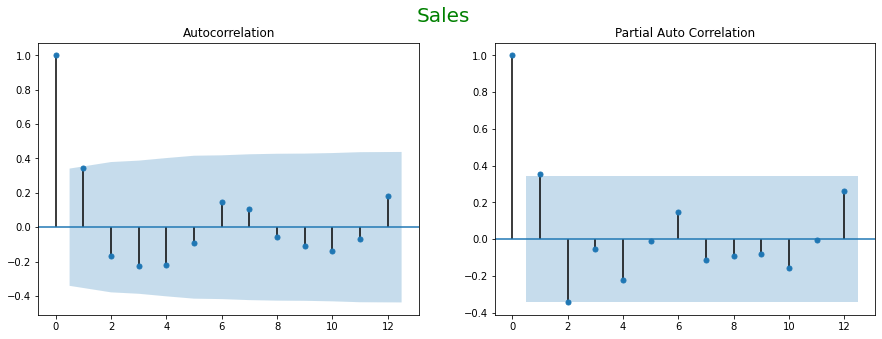

****************************************************************************************************


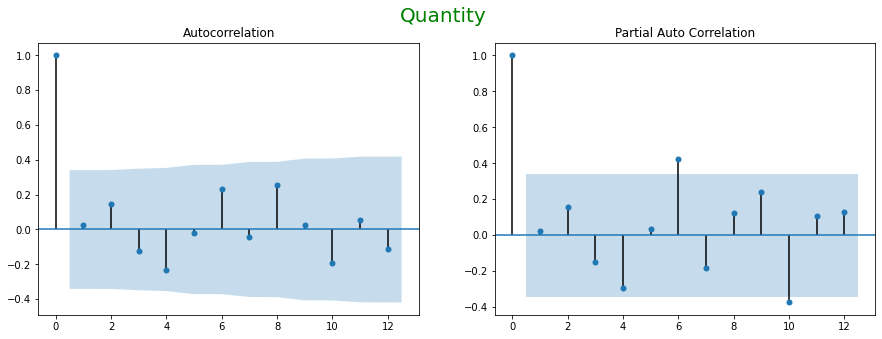

****************************************************************************************************


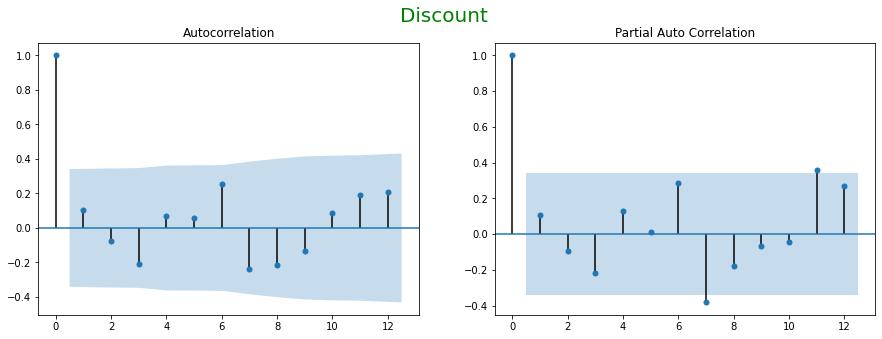

****************************************************************************************************


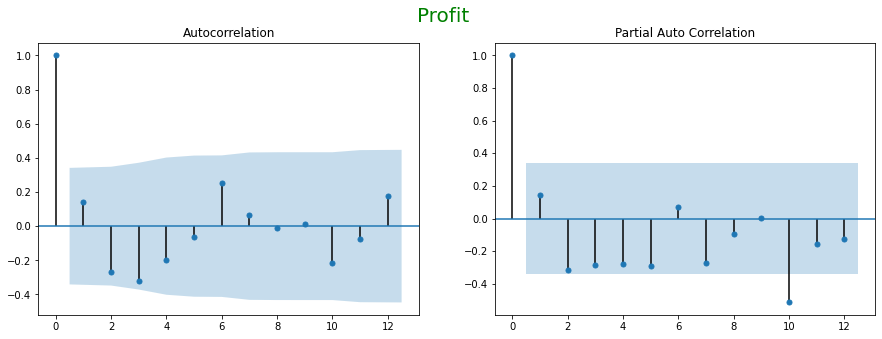

****************************************************************************************************


In [152]:
# ACF and PACF plots
for i in train_df2.columns:
    ROWS = 1; COLS = 2
    fig,ax = plt.subplots(ROWS,COLS,figsize=(15,5))
    plt.suptitle(i,size=20,color="g")
    plot_acf(train_df2[i], lags=12, ax=ax[0]);
    plt.title("Auto Correlation")

    plot_pacf(train_df2[i], lags=12, ax=ax[1]);
    plt.title("Partial Auto Correlation")

    plt.show()
    print(100*"*")

In [153]:
exog_train = train_df2[['Quantity', 'Discount', 'Profit']] 
exog_test =test_df2[['Quantity', 'Discount', 'Profit']]
print(exog_train.head(5))
print(exog_test.head(5))
print('exog_train = {}, train = {}'.format( len(exog_train), len(train_df2)))

            Quantity  Discount     Profit
Order Date                               
2014-01-31  3.303797  0.132278   9.122672
2014-02-28  3.217391  0.108696   7.904750
2014-03-31  3.343949  0.133121   8.931531
2014-04-30  3.585185  0.105556   9.714771
2014-05-31  3.672131  0.145492  11.376671
            Quantity  Discount    Profit
Order Date                              
2016-10-31  3.647959  0.147704  8.295118
2016-11-30  3.562162  0.182297  8.606437
2016-12-31  3.610795  0.154886  9.151504
2017-01-31  3.625806  0.149032  8.839050
2017-02-28  3.392523  0.136916  9.506979
exog_train = 33, train = 33


In [154]:
## making dataframe for best p and q values by using AIC values 
import warnings
warnings.filterwarnings("ignore")

k = [];l = [];m = [];n = [];o =[];h=[]
for p in range(1,2):
    for q in range(1,2):
      for d in range(1,2):
        m1 = SARIMAX(train_df2.Sales, order=(p,d,q), seasonal_order=(p,d,q,12), exog = exog_train.values).fit()
        k.append (p)
        l.append (q)
        h.append (d)
        m.append (m1.aic)
        n.append (m1.bic)
        o.append (m1.hqic)

ii_df4 = pd.DataFrame({"p value":k,"d value":h,"q value":l,"AIC values":m,"BIC values":n,"HQIC values":o})

In [155]:
# printing different p,d,q,AIC,BIC and HQIC VALUES FOR THE MODEL
print(ii_df4 )

   p value  d value  q value  AIC values  BIC values  HQIC values
0        1        1        1  142.037834  150.003692   143.592853


In [156]:
 # finding lowest values of AIC and show that row

ii_df4[ii_df4["AIC values"]==np.min(ii_df4["AIC values"])]

,p value,d value,q value,AIC values,BIC values,HQIC values
0,1,1,1,142.037834,150.003692,143.592853


In [169]:
# model creaion
sarimax_model = SARIMAX(train_df2.Sales, order=(1,1,1), seasonal_order=(1,1,1,12), exog = exog_train.values).fit()

In [170]:
# Arma Model where p = 1,q =1 and d=1
print(sarimax_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   33
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -63.019
Date:                            Tue, 29 Nov 2022   AIC                            142.038
Time:                                    02:08:44   BIC                            150.004
Sample:                                01-31-2014   HQIC                           143.593
                                     - 09-30-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -14.1587      7.543     -1.877      0.061     -28.942       0.625
x2            33.8674     73.032   

Forecasting the values in serimax model

In [171]:
# forecasts sales by using the Model

forecasts4 = sarimax_model.forecast(len(test_df2), exog=exog_test.values)
print(forecasts4)

2016-10-31    56.549369
2016-11-30    56.339232
2016-12-31    61.443089
2017-01-31    65.456422
2017-02-28    79.607568
2017-03-31    71.522035
2017-04-30    67.873445
2017-05-31    65.306436
2017-06-30    67.423855
2017-07-31    59.266178
2017-08-31    51.600181
2017-09-30    57.204184
2017-10-31    62.808321
2017-11-30    56.069563
2017-12-31    64.418518
Freq: M, Name: predicted_mean, dtype: float64


In [172]:
# actual vs forecasted values(test)
actual = []; forcast = []

for i in range(len(forecasts4)):
    actual.append(test_df2["Sales"][i])
    forcast.append(forecasts4[i])

df_res4 = pd.DataFrame({'actual':actual, 'forcasted':forcast},index =test_df2.index)
df_res4['err'] = df_res4.actual - df_res4.forcasted
print(df_res4)

               actual  forcasted        err
Order Date                                 
2016-10-31  70.193107  56.549369  13.643738
2016-11-30  61.443541  56.339232   5.104309
2016-12-31  59.690494  61.443089  -1.752595
2017-01-31  71.105232  65.456422   5.648811
2017-02-28  81.429664  79.607568   1.822095
2017-03-31  71.759761  71.522035   0.237726
2017-04-30  66.630387  67.873445  -1.243058
2017-05-31  64.237419  65.306436  -1.069017
2017-06-30  66.638420  67.423855  -0.785434
2017-07-31  68.614611  59.266178   9.348433
2017-08-31  63.525284  51.600181  11.925104
2017-09-30  64.787510  57.204184   7.583325
2017-10-31  59.416389  62.808321  -3.391932
2017-11-30  63.674316  56.069563   7.604753
2017-12-31  59.746515  64.418518  -4.672002


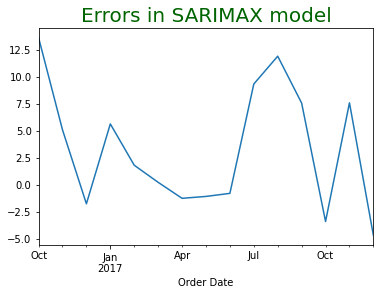

In [173]:
# errors for ARMA model(test)
plt.title("Errors in SARIMAX model",size = 20,color="darkgreen")
df_res4.err.plot()
plt.show()

LJung-Box test (model testeing)

In [174]:
# checking the model is good or bad 
test(sarimax_model)

Fail-to-Reject H0. Good model


In [175]:
# calculating the errors(SARIMAX) 
# low mse and rmse is good for the model
p=1;q=1;d=1
msg4 = 'SARIMAX Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse4 = mean_squared_error(df_res4.actual, df_res4.forcasted)
print(msg4 + "\n\tMSE = {}\n\tRMSE = {}".format(mse4,np.sqrt(mse4)))

SARIMAX Model. Order=(1,1,1)
	MSE = 42.14272328483647
	RMSE = 6.491742700141193


Plotting the actual - forecasted for SARIMAX

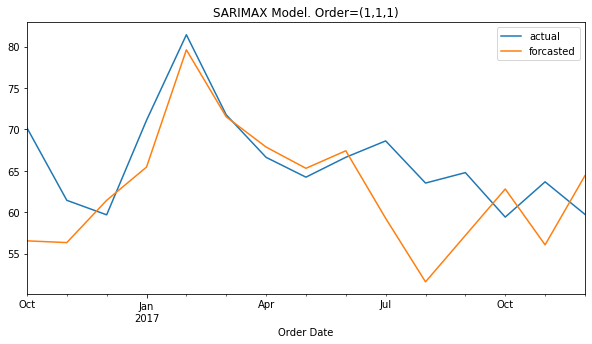

In [176]:
# Plot actual vs. forecasted values

df_res4.actual.plot(figsize=(10,5),legend=True)
df_res4.forcasted.plot(legend=True)
plt.title(msg4)
plt.show()

In [177]:
# exogenious factor
exog_4 = new_sales_df[['Quantity', 'Discount', 'Profit']] 
print(exog_4.head(5))
print('exog = {}'.format( len(exog_4)))

            Quantity  Discount     Profit
Order Date                               
2014-01-31  3.303797  0.132278   9.122672
2014-02-28  3.217391  0.108696   7.904750
2014-03-31  3.343949  0.133121   8.931531
2014-04-30  3.585185  0.105556   9.714771
2014-05-31  3.672131  0.145492  11.376671
exog = 48


In [178]:
# forecasts sales by using the Model

stop= len(new_sales_df)
forecasted_values4 = sarimax_model.forecast(stop,exog = exog_4)
print(forecasted_values4)

2016-10-31    66.032826
2016-11-30    54.375775
2016-12-31    63.119757
2017-01-31    69.990870
2017-02-28    87.536070
2017-03-31    69.179928
2017-04-30    65.905489
2017-05-31    66.387485
2017-06-30    72.474955
2017-07-31    72.520837
2017-08-31    52.735364
2017-09-30    57.289805
2017-10-31    72.254902
2017-11-30    59.610491
2017-12-31    52.727788
2018-01-31    67.528093
2018-02-28    71.272132
2018-03-31    65.134409
2018-04-30    70.249571
2018-05-31    59.959491
2018-06-30    65.873518
2018-07-31    60.476390
2018-08-31    51.403970
2018-09-30    55.204267
2018-10-31    74.537091
2018-11-30    62.858522
2018-12-31    56.766757
2019-01-31    57.814858
2019-02-28    66.013180
2019-03-31    63.815385
2019-04-30    57.164762
2019-05-31    68.863267
2019-06-30    65.965248
2019-07-31    57.045952
2019-08-31    51.410433
2019-09-30    54.505268
2019-10-31    55.970129
2019-11-30    58.537039
2019-12-31    58.174625
2020-01-31    66.347601
2020-02-29    71.927869
2020-03-31    64

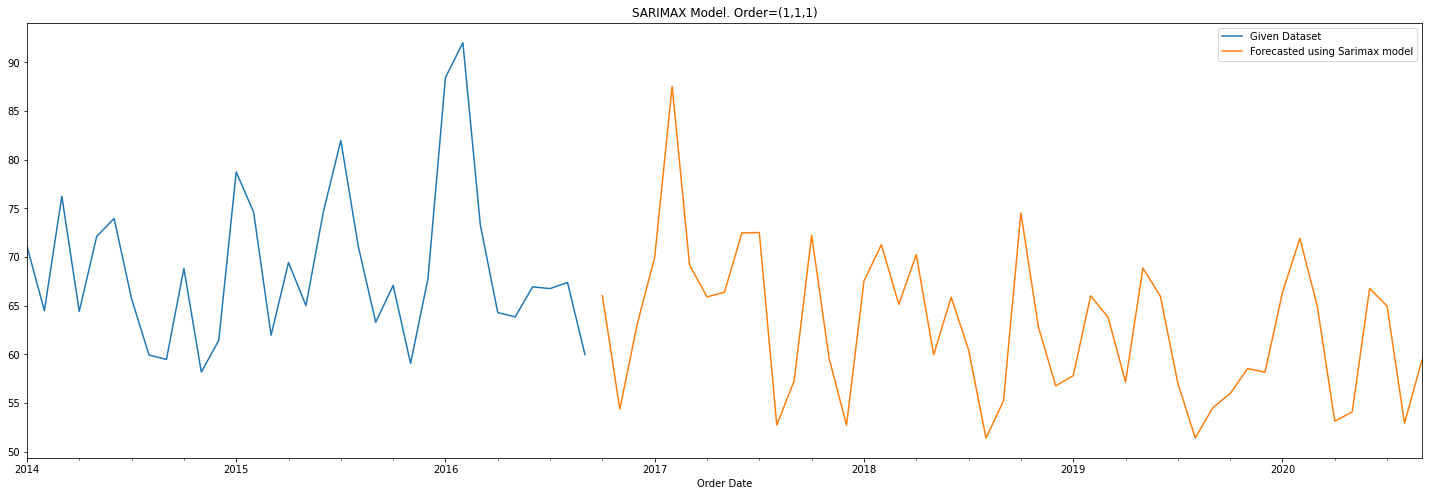

In [179]:
# Plot Given data and forecasted values

train_df2.Sales.plot(figsize=(25,8),label="Given Dataset")
forecasted_values4.plot(label="Forecasted using Sarimax model")
plt.legend()
plt.title(msg4)
plt.show()

 ### Evaluation

In [181]:
 # creating dataframe for errors for all models

errors = pd.DataFrame({"Model Names":["ARMA","ARIMA","SARIMA","SARIMAX"],"MSE":[mse1,mse2,mse3,mse4],
              "RMSE":[np.sqrt(mse1),np.sqrt(mse2),np.sqrt(mse3),np.sqrt(mse4)]})

In [182]:
# creating function to plot performance for comparison 

def plot_s(x1,y1,z1,k1):
    
    for bar in x1.patches:
        plt.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height())
                     , ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
    # Setting the label for x-axis
    plt.xlabel(y1, size=14)

    # Setting the label for y-axis
    plt.ylabel(z1, size=20)

    # Setting the title for the graph
    plt.title(k1,size=20)

    # Finally showing the plot
    plt.show()

In [183]:
print(errors)

  Model Names        MSE      RMSE
0        ARMA  42.143043  6.491767
1       ARIMA  38.591909  6.212239
2      SARIMA  46.092850  6.789172
3     SARIMAX  42.142723  6.491743


Plotting model performance for comparison (based on RMSE and MSE)

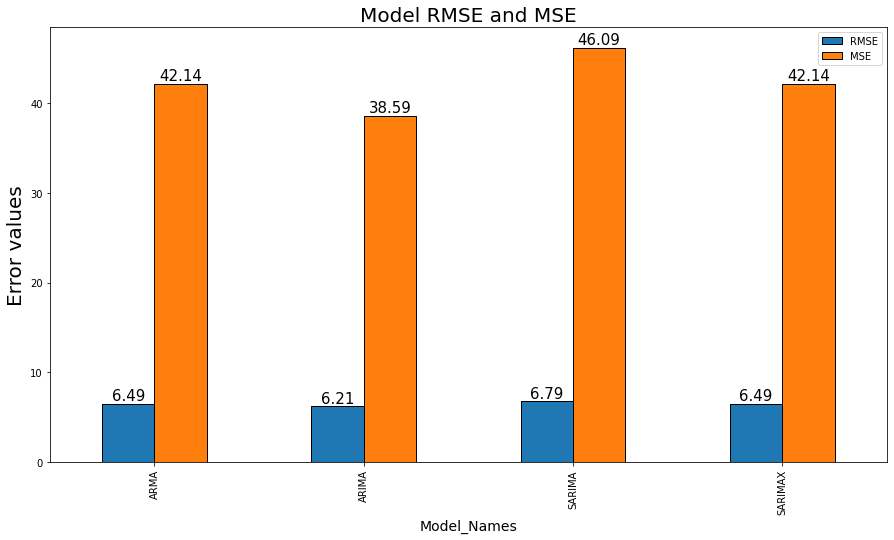

In [184]:
# plotting model performance for comparison 

import matplotlib.pyplot as plt
fig,ax1= plt.subplots(1,1,figsize=(15,8))
x1=errors.plot(x="Model Names", y=[ "RMSE","MSE"], kind="bar",ax=ax1,edgecolor='black')

plot_s(x1,"Model_Names","Error values","Model RMSE and MSE")

 Plotting the actual - Forecasted graphs for all models

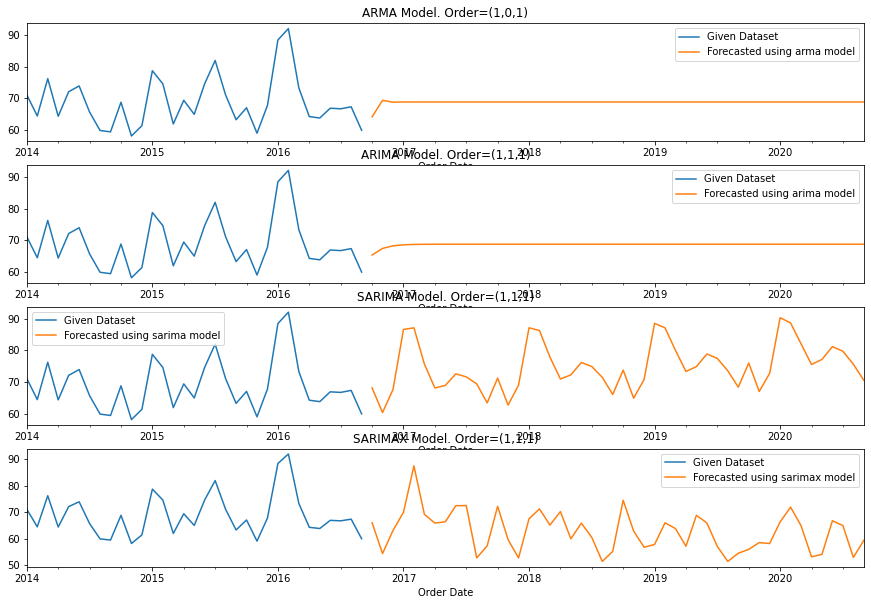

In [195]:
 # plotting the actual - predicted error
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,10))

train1["Sales"].plot(label="Given Dataset",ax=ax1)
forecasted_values1.plot(ax=ax1,label="Forecasted using arma model")
ax1.set_title(msg1)
ax1.legend()

train1["Sales"].plot(label="Given Dataset",ax=ax2)
forecasted_values2.plot(ax=ax2,label="Forecasted using arima model")
ax2.set_title(msg2)
ax2.legend()

train1["Sales"].plot(label="Given Dataset",ax=ax3)
forecasted_values3.plot(ax=ax3,label="Forecasted using sarima model")
ax3.set_title(msg3)
ax3.legend()

train_df2["Sales"].plot(label="Given Dataset",ax=ax4)
forecasted_values4.plot(ax=ax4,label="Forecasted using sarimax model")
ax4.set_title(msg4)
ax4.legend()

plt.show()

### Conclusion
>SARIMAX model gives us best forecasted values with less errors . So we can use it for future buisness purpose to forecast furniture sales in future.
 (the actual and forecasted values are So close to each Other )

In [186]:
# creating exoginious factors for the final model

exog_1 = new_sales_df[['Quantity', 'Discount', 'Profit']] 
print(exog_1.head(5))
print('exog = {}'.format( len(exog_1)))

            Quantity  Discount     Profit
Order Date                               
2014-01-31  3.303797  0.132278   9.122672
2014-02-28  3.217391  0.108696   7.904750
2014-03-31  3.343949  0.133121   8.931531
2014-04-30  3.585185  0.105556   9.714771
2014-05-31  3.672131  0.145492  11.376671
exog = 48


In [188]:
# Arima Model where p = 1,q =1 and d=1
ultimate_model = SARIMAX(new_sales_df.Sales, order=(1,1,1), seasonal_order=(1,1,1,12), exog = exog_1.values).fit()
print(ultimate_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -110.126
Date:                            Tue, 29 Nov 2022   AIC                            236.252
Time:                                    02:12:53   BIC                            248.695
Sample:                                01-31-2014   HQIC                           240.547
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3922      3.683     -0.106      0.915      -7.611       6.826
x2            33.6871     51.883   

In [189]:
# forecasts sales by using the Model

stop= len(new_sales_df) 
forecasted_values = ultimate_model.forecast(stop,exog=exog_1.values)
print(forecasted_values)

2018-01-31    72.935309
2018-02-28    75.155913
2018-03-31    72.275522
2018-04-30    60.391242
2018-05-31    71.600560
2018-06-30    60.291623
2018-07-31    62.142125
2018-08-31    51.591514
2018-09-30    60.036223
2018-10-31    61.645855
2018-11-30    58.679379
2018-12-31    50.276192
2019-01-31    75.347340
2019-02-28    76.331375
2019-03-31    58.785682
2019-04-30    57.137760
2019-05-31    58.756028
2019-06-30    55.605497
2019-07-31    72.496211
2019-08-31    55.317925
2019-09-30    56.255155
2019-10-31    50.096830
2019-11-30    55.191525
2019-12-31    50.043260
2020-01-31    78.134319
2020-02-29    80.792910
2020-03-31    64.448007
2020-04-30    49.073323
2020-05-31    51.611443
2020-06-30    50.130019
2020-07-31    54.741687
2020-08-31    52.405646
2020-09-30    48.203951
2020-10-31    50.286217
2020-11-30    51.435901
2020-12-31    42.882084
2021-01-31    57.417656
2021-02-28    66.633293
2021-03-31    57.388657
2021-04-30    51.970695
2021-05-31    49.699904
2021-06-30    51

In [190]:
# main data
df2 = pd.DataFrame({"sales":new_sales_df.Sales.values},index=exog_1.index)

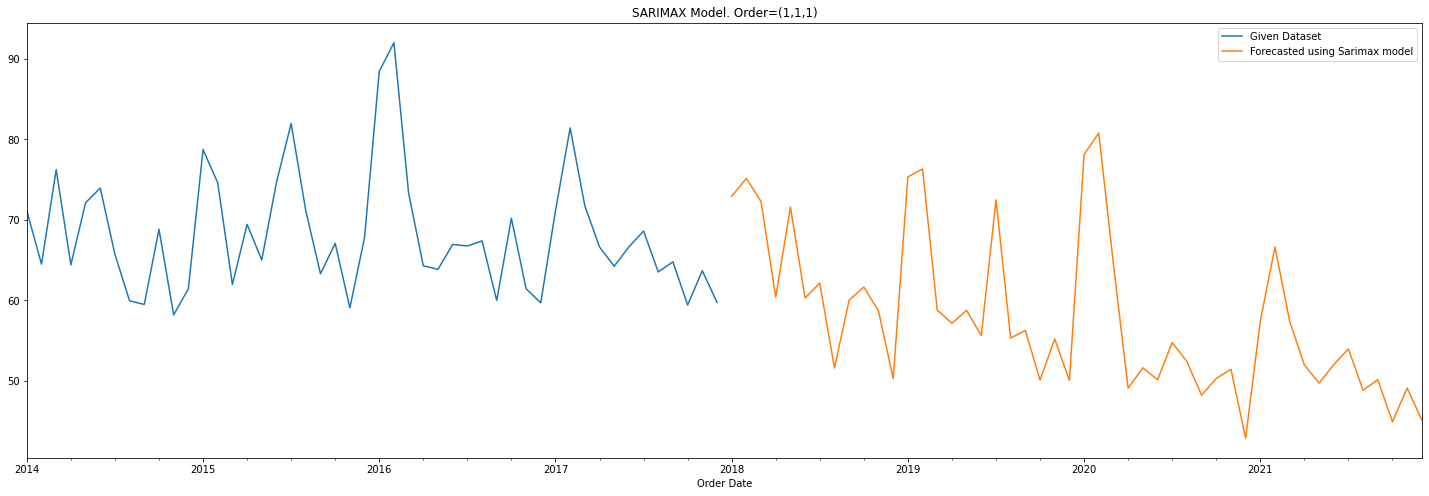

In [191]:
# Plot Given data vs. forecasted values values

df2.sales.plot(figsize=(25,8),label="Given Dataset")
forecasted_values.plot(label="Forecasted using Sarimax model")
plt.legend()
plt.title(msg4)
plt.show()